In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

stock_df = pd.read_csv('indexData.csv')
stock_df

2024-01-19 21:13:44.162467: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-19 21:13:45.132762: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...,...
112452,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0


### Data preprocessing

In [3]:
stock_NYA_df = stock_df[stock_df['Index'] == 'NYA']
stock_NYA_df

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.000000e+00
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.000000e+00
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.000000e+00
...,...,...,...,...,...,...,...,...
13943,NYA,2021-05-24,16375.000000,16508.519530,16375.000000,16464.689450,16464.689450,2.947400e+09
13944,NYA,2021-05-25,16464.689450,16525.810550,16375.150390,16390.189450,16390.189450,3.420870e+09
13945,NYA,2021-05-26,16390.189450,16466.339840,16388.320310,16451.960940,16451.960940,3.674490e+09
13946,NYA,2021-05-27,16451.960940,16546.359380,16451.960940,16531.949220,16531.949220,5.201110e+09


In [4]:
stock_NYA_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13948 entries, 0 to 13947
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      13948 non-null  object 
 1   Date       13948 non-null  object 
 2   Open       13947 non-null  float64
 3   High       13947 non-null  float64
 4   Low        13947 non-null  float64
 5   Close      13947 non-null  float64
 6   Adj Close  13947 non-null  float64
 7   Volume     13947 non-null  float64
dtypes: float64(6), object(2)
memory usage: 980.7+ KB


In [5]:
stock_NYA_df = stock_NYA_df.dropna()
stock_NYA_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13947 entries, 0 to 13947
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      13947 non-null  object 
 1   Date       13947 non-null  object 
 2   Open       13947 non-null  float64
 3   High       13947 non-null  float64
 4   Low        13947 non-null  float64
 5   Close      13947 non-null  float64
 6   Adj Close  13947 non-null  float64
 7   Volume     13947 non-null  float64
dtypes: float64(6), object(2)
memory usage: 980.6+ KB


In [6]:
stock_NYA_df['Date'] = pd.to_datetime(stock_NYA_df['Date'])
stock_NYA_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13947 entries, 0 to 13947
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Index      13947 non-null  object        
 1   Date       13947 non-null  datetime64[ns]
 2   Open       13947 non-null  float64       
 3   High       13947 non-null  float64       
 4   Low        13947 non-null  float64       
 5   Close      13947 non-null  float64       
 6   Adj Close  13947 non-null  float64       
 7   Volume     13947 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 980.6+ KB


/tmp/ipykernel_7615/3815177697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_NYA_df['Date'] = pd.to_datetime(stock_NYA_df['Date'])


In [7]:
stock_NYA_df['day_difference'] = stock_NYA_df['Date'].diff().dt.days
stock_NYA_df

/tmp/ipykernel_7615/761583660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_NYA_df['day_difference'] = stock_NYA_df['Date'].diff().dt.days


,Index,Date,Open,High,Low,Close,Adj Close,Volume,day_difference
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00,NaN
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00,3.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.000000e+00,1.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.000000e+00,1.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.000000e+00,1.0
...,...,...,...,...,...,...,...,...,...
13943,NYA,2021-05-24,16375.000000,16508.519530,16375.000000,16464.689450,16464.689450,2.947400e+09,3.0
13944,NYA,2021-05-25,16464.689450,16525.810550,16375.150390,16390.189450,16390.189450,3.420870e+09,1.0
13945,NYA,2021-05-26,16390.189450,16466.339840,16388.320310,16451.960940,16451.960940,3.674490e+09,1.0
13946,NYA,2021-05-27,16451.960940,16546.359380,16451.960940,16531.949220,16531.949220,5.201110e+09,1.0


In [8]:
stock_NYA_df['day_difference'].value_counts()

day_difference
1.0    10889
3.0     2556
4.0      332
2.0      165
5.0        3
7.0        1
Name: count, dtype: int64

In [9]:
data = stock_NYA_df['Adj Close']
data

0          528.690002
1          527.210022
2          527.840027
3          531.119995
4          532.070007
             ...     
13943    16464.689450
13944    16390.189450
13945    16451.960940
13946    16531.949220
13947    16555.660160
Name: Adj Close, Length: 13947, dtype: float64

In [10]:
dates = stock_NYA_df['Date']
dates

0       1965-12-31
1       1966-01-03
2       1966-01-04
3       1966-01-05
4       1966-01-06
           ...    
13943   2021-05-24
13944   2021-05-25
13945   2021-05-26
13946   2021-05-27
13947   2021-05-28
Name: Date, Length: 13947, dtype: datetime64[ns]

In [11]:
data.shape

(13947,)

In [12]:
data = np.reshape(data, (len(data), 1))
data.shape

(13947, 1)

In [13]:
data

array([[  528.690002],
       [  527.210022],
       [  527.840027],
       ...,
       [16451.96094 ],
       [16531.94922 ],
       [16555.66016 ]])

In [14]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.01113857],
       [0.01104745],
       [0.01108624],
       ...,
       [0.991475  ],
       [0.99639958],
       [0.99785937]])

In [15]:
window_size = 10

X, y = [], []

for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i-window_size:i, 0])
    y.append(scaled_data[i, 0])

X[:2]

[array([0.01113857, 0.01104745, 0.01108624, 0.01128818, 0.01134666,
        0.01137929, 0.01145748, 0.01148334, 0.01142486, 0.01149012]),
 array([0.01104745, 0.01108624, 0.01128818, 0.01134666, 0.01137929,
        0.01145748, 0.01148334, 0.01142486, 0.01149012, 0.01155476])]

In [16]:
X, y = np.array(X), np.array(y)
X[:2]

array([[0.01113857, 0.01104745, 0.01108624, 0.01128818, 0.01134666,
        0.01137929, 0.01145748, 0.01148334, 0.01142486, 0.01149012],
       [0.01104745, 0.01108624, 0.01128818, 0.01134666, 0.01137929,
        0.01145748, 0.01148334, 0.01142486, 0.01149012, 0.01155476]])

In [17]:
X.shape

(13937, 10)

In [18]:
train_split = 0.8
validation_split = 0.1
test_split = 0.1

train_split_index = int(len(scaled_data) * train_split)
validation_split_index = int(len(scaled_data) * (train_split + validation_split))

X_train = X[:train_split_index]
Y_train = y[:train_split_index]
X_validation = X[train_split_index:validation_split_index]
Y_validation = y[train_split_index:validation_split_index]
X_test = X[validation_split_index:]
Y_test = y[validation_split_index:]

print("Rozmiar zbioru treningowego:", len(X_train))
print("Rozmiar zbioru walidacyjnego:", len(X_validation))
print("Rozmiar zbioru testowego:", len(X_test))

Rozmiar zbioru treningowego: 11157
Rozmiar zbioru walidacyjnego: 1395
Rozmiar zbioru testowego: 1385


In [19]:
# indices = np.arange(len(Y_train))
# np.random.shuffle(indices)
# X_train = X_train[indices]
# Y_train = Y_train[indices]

In [20]:
dates = dates[window_size:]
print(len(dates))

13937


In [21]:
X_train[:2]

array([[0.01113857, 0.01104745, 0.01108624, 0.01128818, 0.01134666,
        0.01137929, 0.01145748, 0.01148334, 0.01142486, 0.01149012],
       [0.01104745, 0.01108624, 0.01128818, 0.01134666, 0.01137929,
        0.01145748, 0.01148334, 0.01142486, 0.01149012, 0.01155476]])

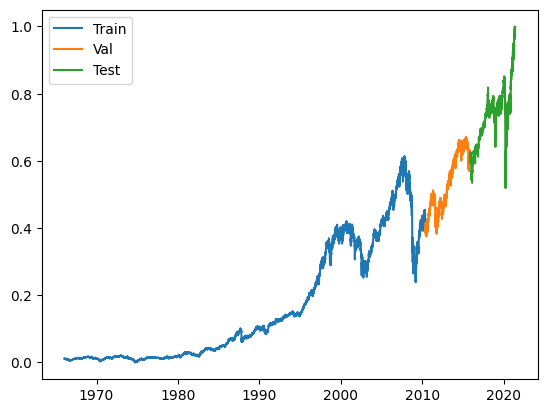

In [22]:
plt.plot(dates[:train_split_index], Y_train)
plt.plot(dates[train_split_index:validation_split_index],Y_validation)
plt.plot(dates[validation_split_index:], Y_test)
plt.legend(['Train', 'Val', 'Test'])

### Creating a model

### Traning a model

In [23]:
model_lstm = tf.keras.models.Sequential()
model_lstm.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(tf.keras.layers.Dropout(0.2))
model_lstm.add(tf.keras.layers.LSTM(units=50))
model_lstm.add(tf.keras.layers.Dropout(0.2))
model_lstm.add(tf.keras.layers.Dense(units=20, activation='tanh'))
model_lstm.add(tf.keras.layers.Dropout(0.2))
model_lstm.add(tf.keras.layers.Dense(units=1))


model_lstm.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mae'])
model_lstm.summary()

history_lstm = model_lstm.fit(X_train, Y_train, epochs=30, batch_size=128, validation_split=0.2)

2024-01-19 21:13:46.948554: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:1000] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-19 21:13:47.036909: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2252] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/rol3ert99/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 50)            │     10,400 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 10, 50)            │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)                │     20,200 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 50)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 20)                │      1,020 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_2 (Dropout)             │ (None, 20)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 1)                 │         21 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 31,641 (123.60 KB)

 Trainable params: 31,641 (123.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0038 - mae: 0.0365 - val_loss: 1.4553e-04 - val_mae: 0.0098
Epoch 2/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.1805e-04 - mae: 0.0125 - val_loss: 8.0068e-04 - val_mae: 0.0263
Epoch 3/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.5147e-04 - mae: 0.0120 - val_loss: 2.9294e-04 - val_mae: 0.0149
Epoch 4/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.6647e-04 - mae: 0.0109 - val_loss: 1.3312e-04 - val_mae: 0.0091
Epoch 5/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.6856e-04 - mae: 0.0114 - val_loss: 2.0300e-04 - val_mae: 0.0121
Epoch 6/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.5978e-04 - mae: 0.0111 - val_loss: 1.1900e-04 - val_mae: 0.0077
Epoch 7/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.2238e-04 - mae: 0.0106 - val_loss: 6.0975e-04 - val_mae: 0.0226
Epoch 8/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.2024e-04 - mae: 0.0108 - val_loss: 2.7246e-04 - val_mae: 0.0141
Epoc

In [24]:
model_lstm.evaluate(X_test, Y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0757e-04 - mae: 0.0202


[0.0008999454439617693, 0.02662712335586548]

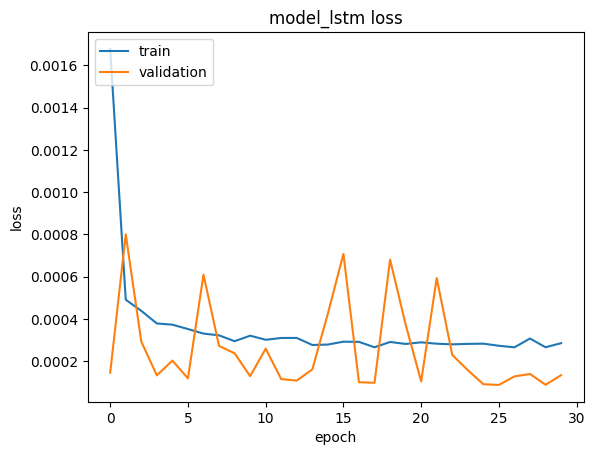

In [25]:
import matplotlib.pyplot as plt
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('model_lstm loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━

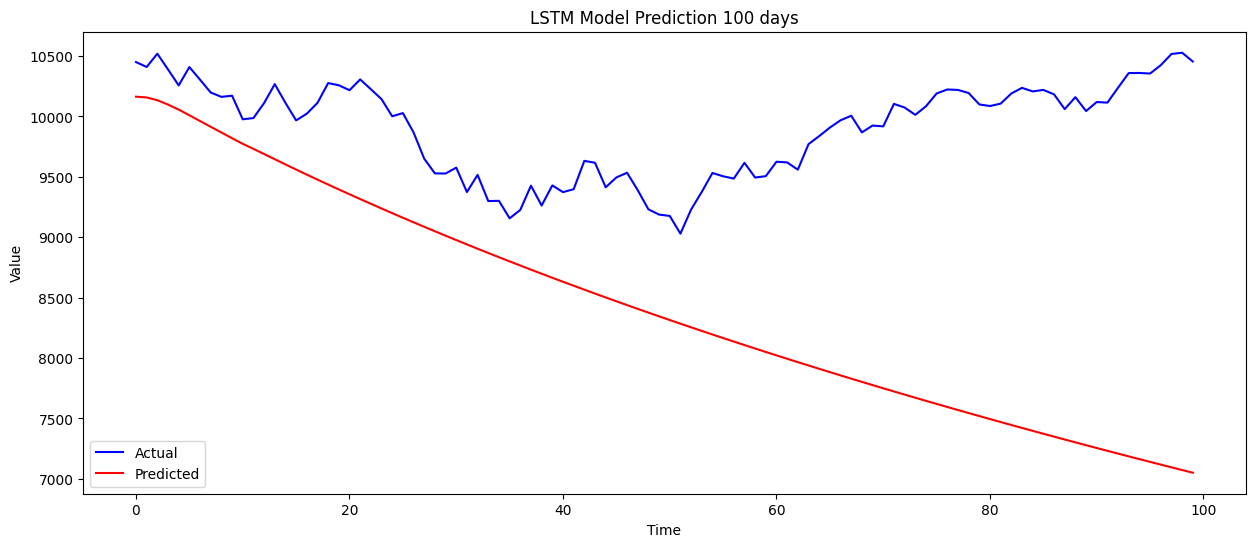

In [26]:
predictions = []
num_predictions = 100

current_window = X_test[0].reshape(1, -1, 1)

for i in range(num_predictions):
    predict_val = model_lstm.predict(current_window)
    predictions.append(predict_val[0, 0])
    current_window = np.concatenate((current_window[:, 1:, :], predict_val.reshape(1, 1, 1)), axis=1)

y_test_actual = scaler.inverse_transform(np.array(Y_test).reshape(-1, 1))
predictions_actual = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

plt.figure(figsize=(15, 6))
plt.plot(y_test_actual[:num_predictions], label='Actual', color='blue')
plt.plot(predictions_actual, label='Predicted', color='red')
plt.title('LSTM Model Prediction 100 days')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [27]:
model_lstm.save('LSTM.h5')

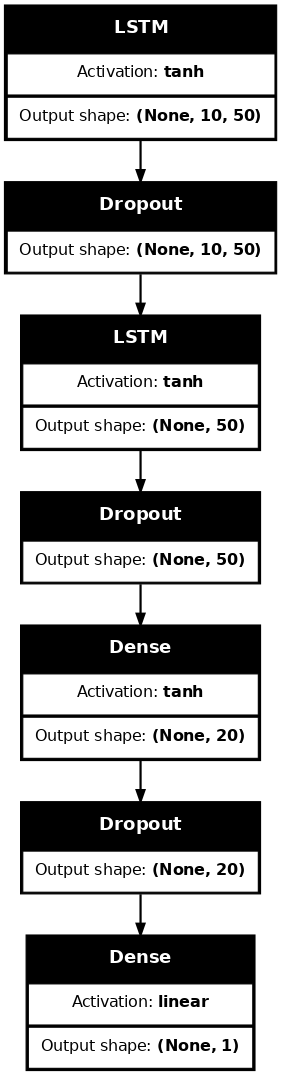

In [28]:
tf.keras.utils.plot_model(model_lstm, show_layer_names=False, show_shapes=True, dpi=80,
                          show_layer_activations=True, to_file = 'model_LSTM.png')